<a href="https://colab.research.google.com/github/IKJHGF/assignment__arguments/blob/main/assignment_co2_emissions_module_4_herkans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [263]:
%reload_ext google.colab.data_table

In [264]:
available_tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
def find_relevant_table(list_of_table):
    for available_table in available_tables:
        if "Fossil CO2 emissions (Mt CO2)" in available_table.columns:
            return available_table
target_table = find_relevant_table(available_tables)
target_table
countries = target_table
countries.columns = countries.columns.droplevel()
countries
countries2 = countries[countries.columns[:5]]
countries2

,Country[19],1990,2005,2017,2021
0,World,22674.116,30049.809,37077.404,37857.580
1,World – International Aviation,258.941,422.777,543.381,NaN
2,World – International Shipping,371.804,572.169,677.248,NaN
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


# **Graph 1 The top 5 biggest CO2 producers in the world**
## make a graph of the top 5 biggest CO2 producers in the world
## x-axis 1990, 2005, 2017, 2021
## y-axis fossile CO2 emmissions (in Mt)
## 5 biggest CO2 producers in the world (based on the latest measurement = 2021)

In [265]:
#filter out rows that aren't countries
countries2 = countries2.drop(labels=[0, 1, 2, 67], axis=0) # drop rows 0, 1 and 2 (world) and row 67 (Europe)
countries2

,Country[19],1990,2005,2017,2021
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
5,Algeria,65.677,98.197,159.929,173
6,Angola,5.851,15.975,30.876,24.45
7,Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


In [266]:
countries2.set_index("Country[19]", inplace=True) # set country as index
countries2

,1990,2005,2017,2021
Country[19],,,,
Afghanistan,2.546,1.063,11.422,8.35
Albania,6.583,4.196,5.026,4.59
Algeria,65.677,98.197,159.929,173
Angola,5.851,15.975,30.876,24.45
Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...
Vietnam,20.182,99.231,218.729,321.41
Western Sahara,0.144,0.227,0.276,0.24
Yemen,6.887,21.768,12.503,12.05


In [267]:
#countries2.dtypes

In [268]:
# change dtypes from object to float for further steps
countries2['1990'] = countries2['1990'].apply(lambda x: x.replace(".",""))
countries2['1990'] = countries2['1990'].astype('float64')
countries2['2005'] = countries2['2005'].apply(lambda x: x.replace(".",""))
countries2['2005'] = countries2['2005'].astype('float64')
countries2['2017'] = countries2['2017'].apply(lambda x: x.replace(".",""))
countries2['2017'] = countries2['2017'].astype('float64')
countries2['2021'] = countries2['2021'].apply(lambda x: x.replace(".",""))
countries2['2021'] = countries2['2021'].astype('float64')
#countries2.dtypes

In [269]:
countries2.sort_values(by=['2021'], ascending=False).head(5) # select top 5 emitters, by measurement in 2021

,1990,2005,2017,2021
Country[19],,,,
China,2397048.0,6263064.0,10877218.0,12466320.0
United States,5085897.0,5971571.0,5107393.0,475208.0
India,605968.0,1210754.0,2454774.0,264878.0
Russia,2378921.0,1733950.0,1764866.0,194254.0
Japan,1149400.0,1276863.0,1320776.0,108469.0


[]

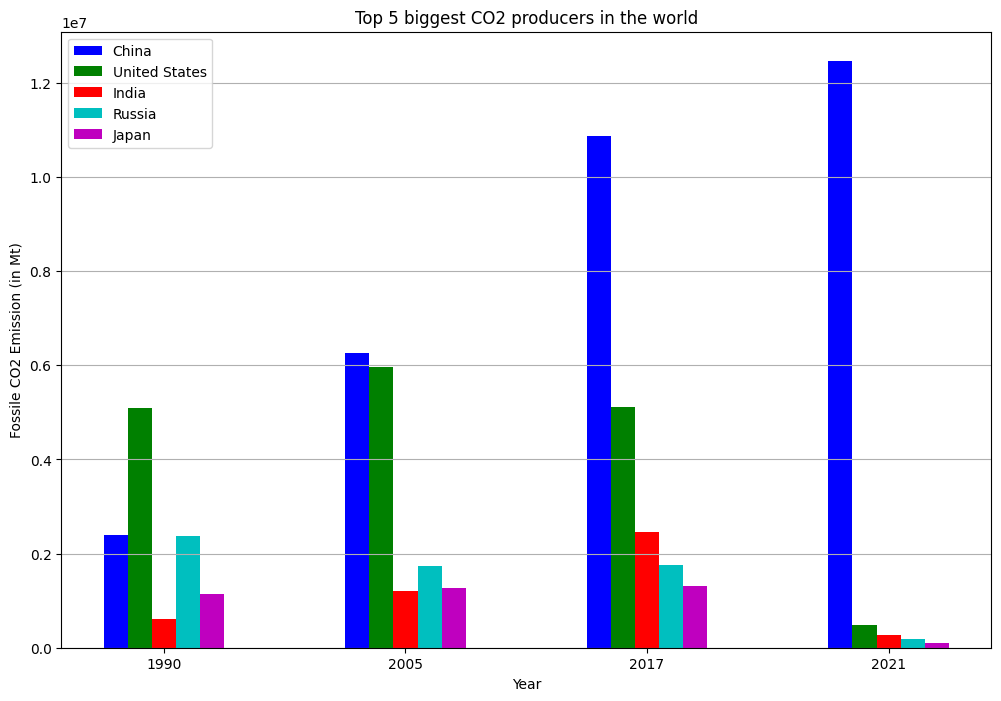

In [270]:
#make graph
fig, ax = plt.subplots(figsize=(12, 8))

x = ['1990', '2005', '2017', '2021']

y1 = countries2.loc['China']
y2 = countries2.loc['United States']
y3 = countries2.loc['India']
y4 = countries2.loc['Russia']
y5 = countries2.loc['Japan']

w = 0.1 # width of bar

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1] #bars next to each other
bar3 = [i+w for i in bar2] #bars next to each other
bar4 = [i+w for i in bar3] #bars next to each other
bar5 = [i+w for i in bar4] #bars next to each other

ax.bar(bar1, y1, w, label="China", color='b')
ax.bar(bar2, y2, w, label="United States", color='g')
ax.bar(bar3, y3, w, label="India", color='r')
ax.bar(bar4, y4, w, label="Russia", color='c')
ax.bar(bar5, y5, w, label="Japan", color='m')

ax.set_title("Top 5 biggest CO2 producers in the world")
ax.set_xlabel("Year")
ax.set_ylabel("Fossile CO2 Emission (in Mt)")
ax.set_xticks(bar1+2*w,x); #set year every time in the middle of the 5 bars
ax.grid(axis = 'y') #set only grid horizontally
ax.legend(); #plot legend
ax.plot()

# **Graph 2 Worst and best changers**

In [271]:
# add new columns with relative change in %, 1990 is 100%
countries2['1990%'] = (countries2.loc[:,'1990'] / countries2.loc[:,'1990']) * 100
countries2['2005%'] = (countries2.loc[:,'2005'] / countries2.loc[:,'1990']) * 100
countries2['2017%'] = (countries2.loc[:,'2017'] / countries2.loc[:,'1990']) * 100
countries2['2021%'] = (countries2.loc[:,'2021'] / countries2.loc[:,'1990']) * 100
countries2

,1990,2005,2017,2021,1990%,2005%,2017%,2021%
Country[19],,,,,,,,
Afghanistan,2546.0,1063.0,11422.0,835.0,100.0,41.751767,448.625295,32.796544
Albania,6583.0,4196.0,5026.0,459.0,100.0,63.739936,76.348170,6.972505
Algeria,65677.0,98197.0,159929.0,173.0,100.0,149.515051,243.508382,0.263410
Angola,5851.0,15975.0,30876.0,2445.0,100.0,273.030251,527.704666,41.787729
Anguilla,6.0,14.0,28.0,3.0,100.0,233.333333,466.666667,50.000000
...,...,...,...,...,...,...,...,...
Vietnam,20182.0,99231.0,218729.0,32141.0,100.0,491.680706,1083.782579,159.255772
Western Sahara,144.0,227.0,276.0,24.0,100.0,157.638889,191.666667,16.666667
Yemen,6887.0,21768.0,12503.0,1205.0,100.0,316.073762,181.544940,17.496733


In [272]:
#select top 5 negative values > bottom values with the largest relative change relating to 1990 (=100%) = biggest reduction of CO2 emission compared to the CO2 emission in 1990
countries_bestchangers = countries2.sort_values(by=['2021%'], ascending=False).tail(~5)
select_countries = countries_bestchangers[::-1].head(5) #filter top 5 of the previous selection
select_countries

,1990,2005,2017,2021,1990%,2005%,2017%,2021%
Country[19],,,,,,,,
Croatia,25164.0,23634.0,17466.0,18.0,100.0,93.919886,69.408679,0.071531
Argentina,112434.0,165429.0,209968.0,189.0,100.0,147.134319,186.747781,0.168099
Botswana,2818.0,4465.0,7913.0,7.0,100.0,158.445706,280.801987,0.248403
Nicaragua,1945.0,4312.0,5919.0,5.0,100.0,221.696658,304.318766,0.257069
Algeria,65677.0,98197.0,159929.0,173.0,100.0,149.515051,243.508382,0.263410


In [273]:
# check in top 5 for correct values, values used for graph below
# algeria = select_countries.loc[select_countries.index[4]]
# algeria

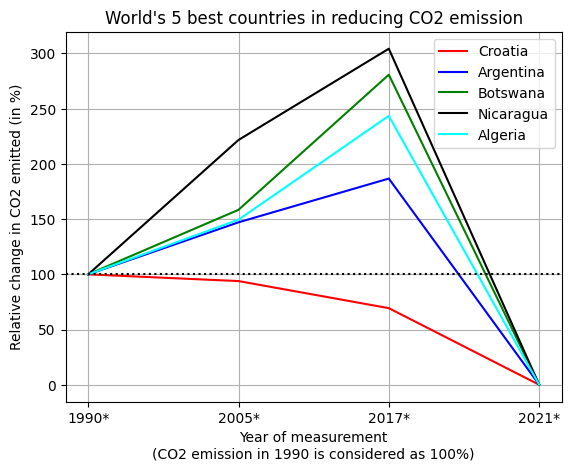

In [274]:
# make graph
fig, axes = plt.subplots(nrows=1, ncols=1)
#1 best changer [0]
croatia = select_countries.loc[select_countries.index[0], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x1 = ['1990*', '2005*', '2017*', '2021*']
y1 = croatia
plt.plot(x1, y1, color="red",  label='Croatia')
#2 best changer [1]
argentina = select_countries.loc[select_countries.index[1], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x2 = ['1990*', '2005*', '2017*', '2021*']
y2 = argentina
plt.plot(x2, y2, color="blue", label='Argentina')
#3 best changer [2]
botswana = select_countries.loc[select_countries.index[2], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x3 = ['1990*', '2005*', '2017*', '2021*']
y3 = botswana
plt.plot(x3, y3, color="green", label='Botswana')
#4 best changer [3]
nicaragua = select_countries.loc[select_countries.index[3], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x4 = ['1990*', '2005*', '2017*', '2021*']
y4 = nicaragua
plt.plot(x4, y4, color="black", label='Nicaragua')
#5 best changer [4]
algeria = select_countries.loc[select_countries.index[4], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x5 = ['1990*', '2005*', '2017*', '2021*']
y5 = algeria
plt.plot(x5, y5, color="cyan", label='Algeria')

plt.title("World's 5 best countries in reducing CO2 emission")
plt.xlabel("Year of measurement\n(CO2 emission in 1990 is considered as 100%)")
plt.ylabel("Relative change in CO2 emitted (in %)")
plt.axhline(y=100, color='black', linestyle = 'dotted')
plt.legend()
plt.grid()
plt.show()

In [275]:
# select 5 countries worst in reducing CO2 emission
countries_worstchangers = countries2.sort_values(by=['2021%'], ascending=False).head(5)
countries_worstchangers 

,1990,2005,2017,2021,1990%,2005%,2017%,2021%
Country[19],,,,,,,,
Greenland,3.0,631.0,518.0,46.0,100.0,21033.333333,17266.666667,1533.333333
Laos,211.0,1038.0,2818.0,2056.0,100.0,491.943128,1335.545024,974.407583
China,2397048.0,6263064.0,10877218.0,12466320.0,100.0,261.282377,453.775561,520.069686
Cambodia,407.0,2686.0,10560.0,1696.0,100.0,659.950860,2594.594595,416.707617
Turks and Caicos Islands,7.0,5.0,165.0,25.0,100.0,71.428571,2357.142857,357.142857


In [276]:
# check in top 5 if values are correct for graph
# turcs_and_caicos_islands = countries_worstchangers.loc[countries_worstchangers.index[4], ['1990%', '2005%', '2017%', '2021%']].astype(float)
# turcs_and_caicos_islands

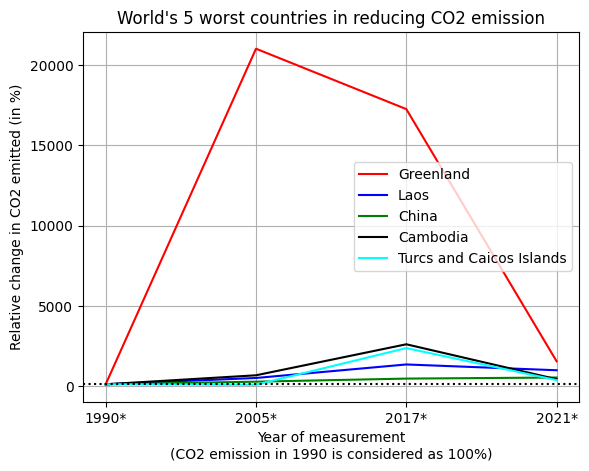

In [277]:
# make graph
fig, axes = plt.subplots(nrows=1, ncols=1)
#1 worst changer [0]
greenland = countries_worstchangers.loc[countries_worstchangers.index[0], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x1 = ['1990*', '2005*', '2017*', '2021*']
y1 = greenland
plt.plot(x1, y1, color="red",  label='Greenland')
#2 worst changer [1]
laos = countries_worstchangers.loc[countries_worstchangers.index[1], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x2 = ['1990*', '2005*', '2017*', '2021*']
y2 = laos
plt.plot(x2, y2, color="blue", label='Laos')
#3 worst changer [2]
china = countries_worstchangers.loc[countries_worstchangers.index[2], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x3 = ['1990*', '2005*', '2017*', '2021*']
y3 = china
plt.plot(x3, y3, color="green", label='China')
#4 worst changer [3]
cambodia = countries_worstchangers.loc[countries_worstchangers.index[3], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x4 = ['1990*', '2005*', '2017*', '2021*']
y4 = cambodia
plt.plot(x4, y4, color="black", label='Cambodia')
#5 worst changer [4]
turks_and_caicos_islands = countries_worstchangers.loc[countries_worstchangers.index[4], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x5 = ['1990*', '2005*', '2017*', '2021*']
y5 = turks_and_caicos_islands
plt.plot(x5, y5, color="cyan", label='Turcs and Caicos Islands')

plt.title("World's 5 worst countries in reducing CO2 emission")
plt.xlabel("Year of measurement\n(CO2 emission in 1990 is considered as 100%)")
plt.ylabel("Relative change in CO2 emitted (in %)")
plt.axhline(y=100, color='black', linestyle='dotted')
plt.legend()
plt.grid()
plt.show()

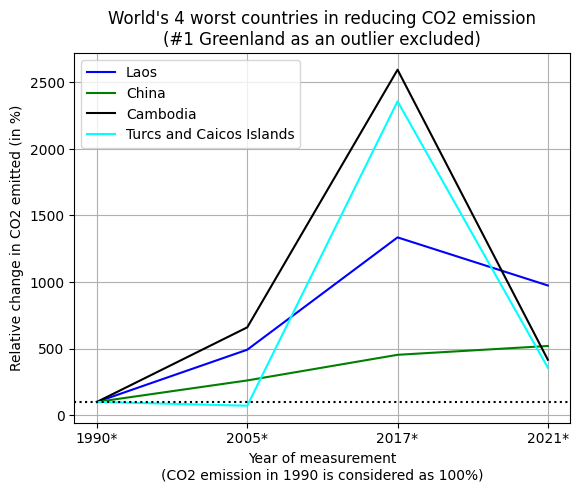

In [278]:
# additional graph that excludes outlier Greenland
fig, axes = plt.subplots(nrows=1, ncols=1)
#2 
laos = countries_worstchangers.loc[countries_worstchangers.index[1], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x2 = ['1990*', '2005*', '2017*', '2021*']
y2 = laos
plt.plot(x2, y2, color="blue", label='Laos')
#3
china = countries_worstchangers.loc[countries_worstchangers.index[2], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x3 = ['1990*', '2005*', '2017*', '2021*']
y3 = china
plt.plot(x3, y3, color="green", label='China')
#4
cambodia = countries_worstchangers.loc[countries_worstchangers.index[3], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x4 = ['1990*', '2005*', '2017*', '2021*']
y4 = cambodia
plt.plot(x4, y4, color="black", label='Cambodia')
#5
turks_and_caicos_islands = countries_worstchangers.loc[countries_worstchangers.index[4], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x5 = ['1990*', '2005*', '2017*', '2021*']
y5 = turks_and_caicos_islands
plt.plot(x5, y5, color="cyan", label='Turcs and Caicos Islands')

plt.title("World's 4 worst countries in reducing CO2 emission\n(#1 Greenland as an outlier excluded)")
plt.xlabel("Year of measurement\n(CO2 emission in 1990 is considered as 100%)")
plt.ylabel("Relative change in CO2 emitted (in %)")
plt.axhline(y=100, color = 'black', linestyle = 'dotted')
plt.legend()
plt.grid()
plt.show()

# Graph 3 Worst and best changers (> 5 Mton)

In [279]:
# same graph but emissions under 5 Mton excluded
countries_worstchangers = countries2.sort_values(by=['2021%'], ascending=False).head(7)
countries_worstchangers_abovefivemt = countries_worstchangers.loc[(countries_worstchangers['1990'] > 5) &
                                                                  (countries_worstchangers['2005'] > 5) & 
                                                                  (countries_worstchangers['2017'] > 5) &
                                                                  (countries_worstchangers['2021'] > 5)
                                                                  ]
countries_worstchangers_abovefivemt

,1990,2005,2017,2021,1990%,2005%,2017%,2021%
Country[19],,,,,,,,
Laos,211.0,1038.0,2818.0,2056.0,100.0,491.943128,1335.545024,974.407583
China,2397048.0,6263064.0,10877218.0,12466320.0,100.0,261.282377,453.775561,520.069686
Cambodia,407.0,2686.0,10560.0,1696.0,100.0,659.950860,2594.594595,416.707617
Maldives,65.0,479.0,964.0,221.0,100.0,736.923077,1483.076923,340.000000
Benin,415.0,2839.0,7097.0,863.0,100.0,684.096386,1710.120482,207.951807


In [280]:
# check if values are correct for graph
# laos = countries_worstchangers_abovefivemt.loc[countries_worstchangers_abovefivemt.index[0], ['1990%', '2005%', '2017%', '2021%']].astype(float)
# laos

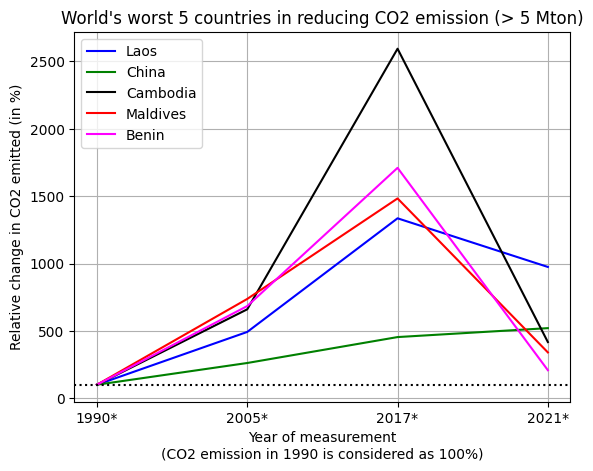

In [281]:
# make graph 5 worst changers (> 5Mton)
fig, axes = plt.subplots(nrows=1, ncols=1)
#1 worst changer (> 5Mton)[0]
laos = countries_worstchangers_abovefivemt.loc[countries_worstchangers_abovefivemt.index[0], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x2 = ['1990*', '2005*', '2017*', '2021*']
y2 = laos
plt.plot(x2, y2, color="blue", label='Laos')
#2 worst changer (> 5Mton)[1]
china = countries_worstchangers_abovefivemt.loc[countries_worstchangers_abovefivemt.index[1], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x3 = ['1990*', '2005*', '2017*', '2021*']
y3 = china
plt.plot(x3, y3, color="green", label='China')
#3 worst changer (> 5Mton)[2]
cambodia = countries_worstchangers_abovefivemt.loc[countries_worstchangers_abovefivemt.index[2], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x4 = ['1990*', '2005*', '2017*', '2021*']
y4 = cambodia
plt.plot(x4, y4, color="black", label='Cambodia')
#4 worst changer (> 5Mton)[3]
maldives = countries_worstchangers_abovefivemt.loc[countries_worstchangers_abovefivemt.index[3], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x1 = ['1990*', '2005*', '2017*', '2021*']
y1 = maldives
plt.plot(x1, y1, color="red",  label='Maldives')
#5 worst changer (> 5Mton)[4]
benin = countries_worstchangers_abovefivemt.loc[countries_worstchangers_abovefivemt.index[4], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x5 = ['1990*', '2005*', '2017*', '2021*']
y5 = benin
plt.plot(x5, y5, color="magenta", label='Benin')

plt.title("World's worst 5 countries in reducing CO2 emission (> 5 Mton)")
plt.xlabel("Year of measurement\n(CO2 emission in 1990 is considered as 100%)")
plt.ylabel("Relative change in CO2 emitted (in %)")
plt.axhline(y=100, color='black', linestyle='dotted')
plt.legend()
plt.grid()
plt.show()

In [282]:
# find 5 best changers (> 5Mton)
countries_bestchangers = countries2.sort_values(by=['2021%'], ascending=False).tail(~6)
select_countries = countries_bestchangers[::-1].head(6) #filter top 5 of the previous selection
select_countries

,1990,2005,2017,2021,1990%,2005%,2017%,2021%
Country[19],,,,,,,,
Croatia,25164.0,23634.0,17466.0,18.0,100.0,93.919886,69.408679,0.071531
Argentina,112434.0,165429.0,209968.0,189.0,100.0,147.134319,186.747781,0.168099
Botswana,2818.0,4465.0,7913.0,7.0,100.0,158.445706,280.801987,0.248403
Nicaragua,1945.0,4312.0,5919.0,5.0,100.0,221.696658,304.318766,0.257069
Algeria,65677.0,98197.0,159929.0,173.0,100.0,149.515051,243.508382,0.263410
New Zealand,24006.0,36746.0,36795.0,326.0,100.0,153.070066,153.274181,1.357994


In [283]:
# find 5 best changers (> 5Mton)
countries_bestchangers_abovefivemt = select_countries.loc[select_countries['2021'] > 5]
countries_bestchangers_abovefivemt = select_countries.loc[(select_countries['1990'] > 5) & (select_countries['2005'] > 5) & (select_countries['2017'] > 5) & (select_countries['2021'] > 5)]
countries_bestchangers_abovefivemt

,1990,2005,2017,2021,1990%,2005%,2017%,2021%
Country[19],,,,,,,,
Croatia,25164.0,23634.0,17466.0,18.0,100.0,93.919886,69.408679,0.071531
Argentina,112434.0,165429.0,209968.0,189.0,100.0,147.134319,186.747781,0.168099
Botswana,2818.0,4465.0,7913.0,7.0,100.0,158.445706,280.801987,0.248403
Algeria,65677.0,98197.0,159929.0,173.0,100.0,149.515051,243.508382,0.263410
New Zealand,24006.0,36746.0,36795.0,326.0,100.0,153.070066,153.274181,1.357994


In [284]:
# check if values are correct for graph
# new_zealand = countries_bestchangers_abovefivemt.loc[countries_bestchangers_abovefivemt.index[4], ['1990%', '2005%', '2017%', '2021%']].astype(float)
# new_zealand

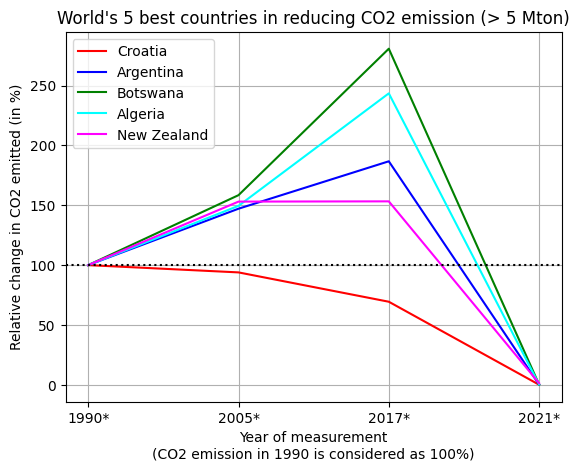

In [286]:
# make graph 5 best changers (> 5Mton)
fig, axes = plt.subplots(nrows=1, ncols=1)
#1
croatia = countries_bestchangers_abovefivemt.loc[countries_bestchangers_abovefivemt.index[0], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x1 = ['1990*', '2005*', '2017*', '2021*']
y1 = croatia
plt.plot(x1, y1, color="red",  label='Croatia')
#2
argentina = countries_bestchangers_abovefivemt.loc[countries_bestchangers_abovefivemt.index[1], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x2 = ['1990*', '2005*', '2017*', '2021*']
y2 = argentina
plt.plot(x2, y2, color="blue", label='Argentina')
#3
botswana = countries_bestchangers_abovefivemt.loc[countries_bestchangers_abovefivemt.index[2], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x3 = ['1990*', '2005*', '2017*', '2021*']
y3 = botswana
plt.plot(x3, y3, color="green", label='Botswana')
#4
algeria = countries_bestchangers_abovefivemt.loc[countries_bestchangers_abovefivemt.index[3], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x5 = ['1990*', '2005*', '2017*', '2021*']
y5 = algeria
plt.plot(x5, y5, color="cyan", label='Algeria')
#5
new_zealand = countries_bestchangers_abovefivemt.loc[countries_bestchangers_abovefivemt.index[4], ['1990%', '2005%', '2017%', '2021%']].astype(float)
x4 = ['1990*', '2005*', '2017*', '2021*']
y4 = new_zealand
plt.plot(x4, y4, color="magenta", label='New Zealand')

plt.title("World's 5 best countries in reducing CO2 emission (> 5 Mton)")
plt.xlabel("Year of measurement\n(CO2 emission in 1990 is considered as 100%)")
plt.ylabel("Relative change in CO2 emitted (in %)")
plt.axhline(y=100, color='black', linestyle = 'dotted')
plt.legend()
plt.grid()
plt.show()